# Federated Learning with HV Circuit Breaker Maintenance Data - Advanced

## Step 1: Install Required Packages

In [1]:
%pip install tensorflow tensorflow_federated pandas openpyxl scikit-learn matplotlib

## Step 2: Import required packages

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Importing custom functions
import breaker_advanced_functions as baf

# Step 3: Data Loading and Preprocessing

In [3]:
# Load data
df = pd.read_excel("HV_Circuit_Breaker_Maintenance_Data.xlsx", sheet_name='Sheet1')

# Clean and encode data
df = df.dropna(thresh=len(df) * 0.5, axis=1).dropna()
df = pd.get_dummies(df, columns=['Breaker_status', 'Heater_status', 'Last_trip_coil_energized'])

# Extract labels and scale features
y = df['Maintenance_required']
X = df.drop(columns=['Maintenance_required', 'Product_variant'])  # Drop 'Product_variant'

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Final combined dataset for training
# Note: 'Product_variant' is not included in the final dataset as per the original code
df_final = X_scaled.copy()
df_final['Maintenance_required'] = y.values

# Step 4: Create Dirichlet Non-IID Client Partition and run comparisons for FedAvg and FedAvg with Momentum

Round 1: Accuracy=0.7275
Round 2: Accuracy=0.7575
Round 3: Accuracy=0.7590
Round 4: Accuracy=0.7700
Round 5: Accuracy=0.7810
Round 6: Accuracy=0.7765
Round 7: Accuracy=0.7765
Round 8: Accuracy=0.7900
Round 9: Accuracy=0.7890
Round 10: Accuracy=0.7995
Round 11: Accuracy=0.8105
Round 12: Accuracy=0.8095
Round 13: Accuracy=0.8130
Round 14: Accuracy=0.8125
Round 15: Accuracy=0.8150
Round 16: Accuracy=0.8185
Round 17: Accuracy=0.8195
Round 18: Accuracy=0.8260
Round 19: Accuracy=0.8265
Round 20: Accuracy=0.8270
Round 1: Accuracy=0.8410
Round 2: Accuracy=0.5925
Round 3: Accuracy=0.7640
Round 4: Accuracy=0.7525
Round 5: Accuracy=0.7585
Round 6: Accuracy=0.7595
Round 7: Accuracy=0.7495
Round 8: Accuracy=0.7595
Round 9: Accuracy=0.7285
Round 10: Accuracy=0.7570
Round 11: Accuracy=0.7435
Round 12: Accuracy=0.7575
Round 13: Accuracy=0.7310
Round 14: Accuracy=0.7630
Round 15: Accuracy=0.7555
Round 16: Accuracy=0.7560
Round 17: Accuracy=0.7620
Round 18: Accuracy=0.7800
Round 19: Accuracy=0.7870
Roun

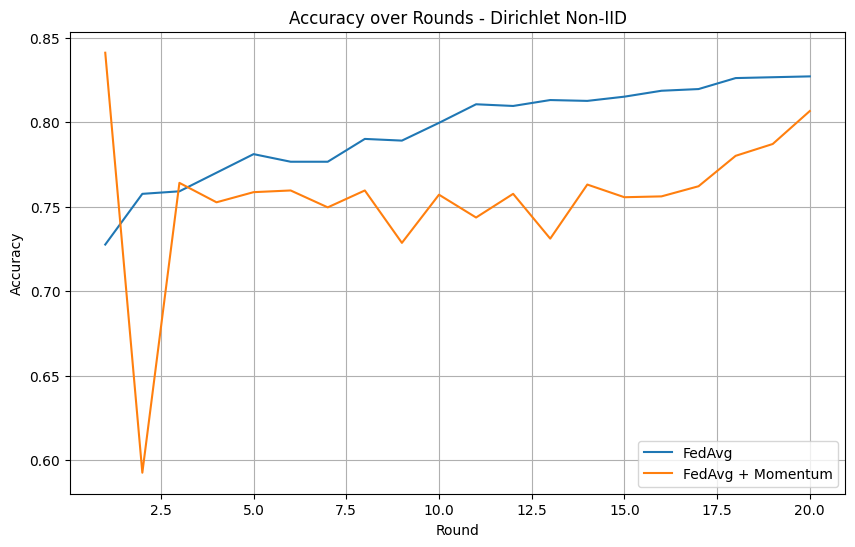

In [4]:
# Create TFF dataset
dirichlet_clients = baf.create_dirichlet_non_iid(df_final, num_clients=5, alpha=0.5, label_col='Maintenance_required')
# Compare on Dirichlet Non-IID data
baf.compare_algorithms(dirichlet_clients, "Dirichlet Non-IID")

# Step 5: Create Feature Skew Non-IID Client Partition and run comparisons for FedAvg and FedAvg with Momentum

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Round 1: Accuracy=0.6010
Round 2: Accuracy=0.6495
Round 3: Accuracy=0.6690
Round 4: Accuracy=0.6740
Round 5: Accuracy=0.6745
Round 6: Accuracy=0.6765
Round 7: Accuracy=0.6745
Round 8: Accuracy=0.6800
Round 9: Accuracy=0.6830
Round 10: Accuracy=0.6870
Round 11: Accuracy=0.6870
Round 12: Accuracy=0.6915
Round 13: Accuracy=0.6895
Round 14: Accuracy=0.6925
Round 15: Accuracy=0.6970
Round 16: Accuracy=0.7050
Round 17: Accuracy=0.7055
Round 18: Accuracy=0.7040
Round 19: Accuracy=0.7080
Round 20: Accuracy=0.7205
Round 1: Accuracy=0.6460
Round 2: Accuracy=0.6725
Round 3: Accuracy=0.6935
Round 4: Accuracy=0.7130
Round 5: Accuracy=0.7295
Round 6: Accuracy=0.7385
Round 7: Accuracy=0.7595
Round 8: Accuracy=0.7700
Round 9: Accuracy=0.7680
Round 10: Accuracy=0.7765
Round 11: Accuracy=0.7745
Round 12: Accuracy=0.7860
Round 13: Accuracy=0.7945
Round 14: Accuracy=0.8045
Round 15: Accuracy=0.8080
Round 16: Accuracy=0.8005
Round 17: Accuracy=0.8140
Round 18: Accuracy=0.8220
Round 19: Accuracy=0.8195
Roun

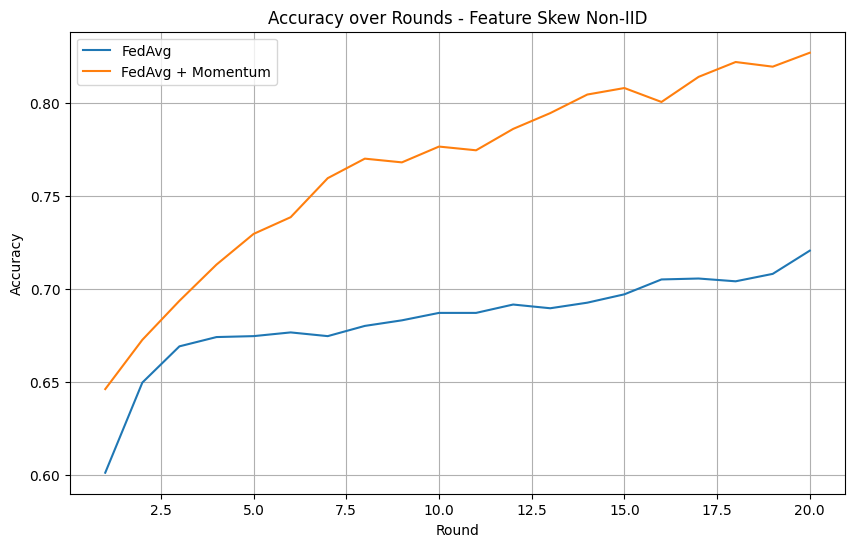

In [5]:
# Create IID dataset
feature_skew_clients = baf.create_feature_skew_non_iid(df_final, num_clients=5, feature='SF6_density', label_col='Maintenance_required')
# Compare on Feature Skew Non-IID data
baf.compare_algorithms(feature_skew_clients, "Feature Skew Non-IID")

# Step 6: Compare All Four Federated Algorithms

Instructions for updating:
Colocations handled automatically by placer.
/usr/local/lib/python3.11/dist-packages/tensorflow_federated/python/learning/models/keras_utils.py:201: UserWarning: Batch Normalization contains non-trainable variables that won't be updated during the training. Consider using Group Normalization instead.
  warnings.warn(


Round 1: Accuracy=0.5665
Round 2: Accuracy=0.6480
Round 3: Accuracy=0.6705
Round 4: Accuracy=0.6735
Round 5: Accuracy=0.6780
Round 6: Accuracy=0.6815
Round 7: Accuracy=0.6805
Round 8: Accuracy=0.6790
Round 9: Accuracy=0.6805
Round 10: Accuracy=0.6835
Round 11: Accuracy=0.6875
Round 12: Accuracy=0.6960
Round 13: Accuracy=0.6965
Round 14: Accuracy=0.6980
Round 15: Accuracy=0.6990
Round 16: Accuracy=0.7030
Round 17: Accuracy=0.7065
Round 18: Accuracy=0.7150
Round 19: Accuracy=0.7150
Round 20: Accuracy=0.7240
Round 1: Accuracy=0.6235
Round 2: Accuracy=0.6860
Round 3: Accuracy=0.7145
Round 4: Accuracy=0.7330
Round 5: Accuracy=0.7515
Round 6: Accuracy=0.7535
Round 7: Accuracy=0.7675
Round 8: Accuracy=0.7805
Round 9: Accuracy=0.7785
Round 10: Accuracy=0.7835
Round 11: Accuracy=0.7860
Round 12: Accuracy=0.7975
Round 13: Accuracy=0.7925
Round 14: Accuracy=0.7945
Round 15: Accuracy=0.8005
Round 16: Accuracy=0.7995
Round 17: Accuracy=0.8065
Round 18: Accuracy=0.8170
Round 19: Accuracy=0.8205
Roun

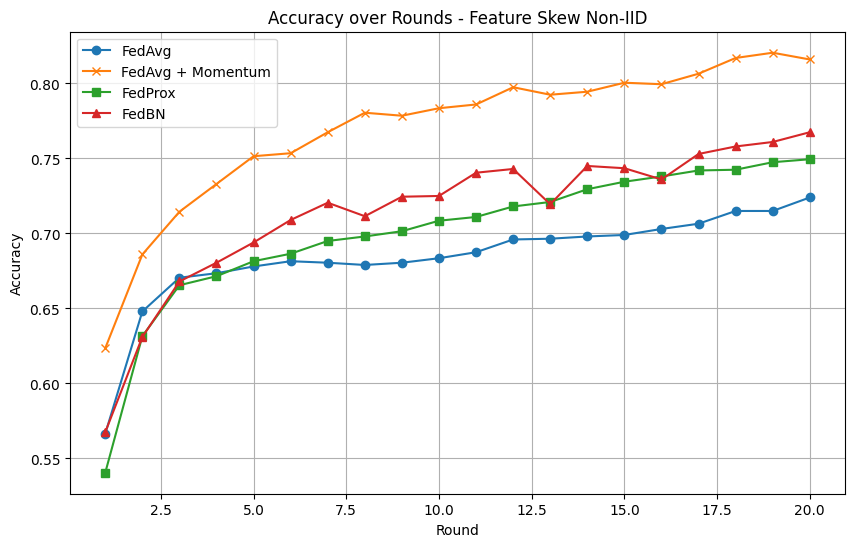

In [6]:
# For Feature Skew Non-IID data, we can also compare all algorithms
# using the compare_all_algorithms function
baf.compare_all_algorithms(feature_skew_clients, "Feature Skew Non-IID", num_rounds=20)